<div style="text-align: right">CSCI E-7 Introduction to Python Programming for Life Sciences, Midterm</div>
<div style="text-align: right">Dino Konstantopoulos, 1 April 2019</div>

<div style="text-align: right">100 points total</div>

# CSCI E-7 Spring 19 Midterm

~~You have up to two hours~~. You have a week. No this is not an April's fool joke, although there are *so* **many** pranks I thought about playing on you tonite, dear class... :-)

Good luck.

In [16]:
%matplotlib inline
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<div style="text-align: right">20 points</div>

# 1. Divisible numbers

**How many numbers are there (not *the* numbers, but *how many*) between zero and a thousand, when you take the square of each number and then add the number 1, can be divided exactly by seventeen (integer division with 0 remainder)?**

</br >
<center>
<img src="divisible.png" width=150 />
</center>

Here's a collection of numbers and their remainder by integer division with 17, using a python list comprehension:

In [3]:
numbers = [16, 17, 18, 33, 34, 35, 100]
print([r % 17 for r in numbers])

[16, 0, 1, 16, 0, 1, 15]


In [70]:
comp_list = [x for x in range(1000) if (x ** 2 + 1) % 17 == 0] 
#This does not include 1000 - but that actually doesn't matter either way
len(comp_list)

118

<div style="text-align: right">40 points</div>

# 2. Biological Networks

</br >
<center>
<img src="endothelial.png" width=600 />
</center>

[Angiogenesis](https://en.wikipedia.org/wiki/Angiogenesis) is the physiological process through which new blood vessels form from pre-existing vessels. The first vessels in the developing embryo form through vasculogenesis, after which angiogenesis is responsible for most, if not all, blood vessel growth during development and in disease. Angiogenesis is a normal and vital process in growth and development, as well as in wound healing and in the formation of granulation tissue. However, it is also a fundamental step in the transition of tumors from a benign state to a malignant one, leading to the use of angiogenesis inhibitors in the treatment of cancer. The essential role of angiogenesis in tumor growth was first proposed in 1971 by [Judah Folkman](https://en.wikipedia.org/wiki/Judah_Folkman), who graduated from Harvard Medical School in 1957. After his graduation, he started his surgical residency right here, at Massachusetts General Hospital.

The Angiogenesis network depicts the causal mechanisms that lead to the angiogenic processes of migration, proliferation and vascular permeability downstream of growth factor signaling, as well as key angiogenic processes.

**You will help Harvard Medical School scientists identify the Angiogenesis nodes with the most connections to other nodes and order them from most connected to least connected. Download the Angiogenesis network from [causalbionet](http://www.causalbionet.com/) (search using the keyword angiogenesis).**

Causalbionet provides biologocal networks in (JSON graph format](http://jsongraphformat.info/), a popular format for scientific graph data, which we will need to convert to GML format so that we can apply the same methods we applied to our food network class material.

Recall that Google's PageRank algorithm unleashes a silver surfer on a graph whose nodes represent the states of the silver surfer state machine surfing the graph, and finds the steady state regime of the Markovian silver surfer chain (a silver surfer surinf the graph randomly from one node to another) by solving a linear system of equations involving the graph's transfer matrix using a sparse matrix representation, or approximately using the power method which leverages the theory of the dominant eigenvector.

PageRank makes the assumption that each and every location on the graph can be reached from any other location, but that is often not the case when the out degree of a location is 0. So we allow for the possibility for any graph location to have a small probability to transit to another location (shrimp eating sharks, remember?). This is represented by Google's damping factor in what I've called the silver surfer equation.

**You will use the `json` package to read in the jgf files from `http://www.causalbionet.com/`, use the `networkx` package to represent the biological angiogenesis network, compute out-degrees the way we did it in class with food networks, and then solve directly (if you can) *and* use an iterative method, to order angiogenesis nodes from busiest to least busiest.**

**For extra credit, plot the angiogenesis causal network using `networkx`' `draw()` function, Finally, where you only label the 5 busiest nodes and the 5 least busiest nodes. Don't waste too much time on this, as it will invove some web search. Probably better to finish section 3 before you do this.**

Below, you will find a few hints about how to convert from pure json format to GML format.

In [5]:
import json
from pprint import pprint

#Using Angiogenesis jgf from Midterm 1 - the website causalbionet not working to download the files on my computer
with open('data/Angiogenesis-2.0-Hs.jgf') as json_data:
    angio = json.load(json_data)
    
metadata = angio['graph']['metadata']
nodes = angio['graph']['nodes']
edges = angio['graph']['edges']
node_ids = [x['id'] for x in nodes]
node_bel_function_type = [x['metadata']['bel_function_type'] for x in nodes]
edges_source = [x['source'] for x in edges]
edges_targets = [x['target'] for x in edges]

gml = ('''graph [
  directed 0''' + '\n' +
  'multigraph 1\n')

#Convert the nodes
for n,b in zip(node_ids, node_bel_function_type):
    gml += ('  node [' + '\n' +
    '    id "' + n.replace('"', '*') + '"' + '\n' +
    '    label "' + n.replace('"', '*') + '"' + '\n' +
    '  ]\n')

#Convert the edges
for s,t in zip(edges_source, edges_targets):
    gml += ('  edge [' + '\n' +
    '    source "' + s.replace('"', '*') + '"' + '\n' +
    '    target "' + t.replace('"', '*') + '"' + '\n' +
    '  ]\n')

gml += ']'

Can you build a string that looks like the standard for a GML graph like the one we used in class?

In [6]:
text_file = open("data/Angiogenesis-2.0-Hs.gml", "w") #w here means "write"
text_file.write(gml)
text_file.close()

In [7]:
import networkx as nx
angiogenesis = nx.read_gml('data/Angiogenesis-2.0-Hs.gml')

In [8]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
Genes = np.array(list(angiogenesis.nodes()))
Adj = nx.to_scipy_sparse_matrix(angiogenesis, dtype=np.float64)

In [9]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()
Trans = (Deginv @ Adj).T
n = len(Genes)

In [10]:
degrees #Out degrees per individual node

array([ 1.,  4.,  6.,  1.,  3.,  1.,  5.,  3.,  1.,  3.,  2.,  2.,  1.,
        4.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1., 19.,
        3.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  2.,  3.,
        1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        6.,  3.,  6.,  3.,  1.,  9.,  4.,  6.,  2.,  3.,  1.,  4., 12.,
        2.,  4.,  2., 17.,  2.,  1.,  1.,  2.,  3.,  1.,  3.,  1.,  1.,
        5.,  4.,  7.,  3.,  4.,  1.,  3.,  1.,  5.,  1.,  2.,  1.,  3.,
        1.,  4.,  6.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,  1., 22.,  6.,
        1.,  1.,  7.,  3.,  3.,  2.,  1.,  4.,  1.,  1.,  2.,  3.,  2.,
        1.,  1.,  2.,  2.,  5.,  1., 13.,  5.,  2.,  2.,  2.,  6.,  1.,
        1.,  3.,  1.,  1.,  1.,  3.,  2.,  2.,  1.,  1.,  3.,  1.,  1.,
        1.,  2.,  3.,  2.,  1.,  5.,  2.,  1.,  1.,  1.,  2., 15.,  2.,
        5.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  1.,  1.,  4.,
        1.,  5.,  5.,  1.,  3.,  4.,  1.,  1.,  1.,  3.,  2.,  1

In [11]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

In [12]:
#Use bubble sort from our lectures, but modify it to work with a list of tuples so that we
#can identify which gene the page rank stands for (and order greatest to least)
def bubble_sort(alist):
    for passnum in range(len(alist)-1, -1, -1):
        swapped = False
        for i in range(passnum):
            if alist[i][1] < alist[i+1][1]:
                alist[i], alist[i+1] = alist[i+1], alist[i]
                swapped = True
        if not swapped:
            break

In [13]:
#To answer the original question, use the code written below to create and store the list of angiogenesis genes 
#into a list of tuples and apply the bubble sort. The output is (Angiogenesis Vessel, Pagerank) 
#where the first parts of the list have the highest page rank in sorted order
my_list = []
for s, p in zip(Genes, pagerank):
    my_list.append((s,p))
    bubble_sort(my_list)
my_list

[('bp(GOBP:*patterning of blood vessels*)', 0.031100910437989706),
 ('tscript(p(HGNC:HIF1A))', 0.024558268633439167),
 ('p(HGNC:VEGFA)', 0.018191901533065685),
 ('p(SFAM:*FGF Family*)', 0.017443842567180765),
 ('tscript(p(SFAM:*NOTCH Family*))', 0.016034587888138673),
 ('bp(GOBP:*cell migration*)', 0.015202769614883496),
 ('bp(GOBP:angiogenesis)', 0.014388247596155947),
 ('kin(p(HGNC:MAPK1))', 0.013214797992489247),
 ('kin(p(HGNC:MAPK3))', 0.01218329496789073),
 ('complex(p(HGNC:VHL),p(HGNC:TCEB1),p(HGNC:TCEB2),p(HGNC:CUL2),p(HGNC:RBX1))',
  0.01196643708879108),
 ('kin(p(HGNC:KDR))', 0.01191255125912854),
 ('kin(p(SFAM:*AKT Family*))', 0.011650612890644556),
 ('bp(GOBP:*blood vessel development*)', 0.01103508511763982),
 ('p(HGNC:HIF1A)', 0.009800587545232074),
 ('bp(GOBP:*cell proliferation*)', 0.009324181173526016),
 ('p(SFAM:*FGFR Family*)', 0.00882443869211631),
 ('deg(p(HGNC:HIF1A))', 0.008788293549860786),
 ('kin(p(HGNC:FLT1))', 0.00835507934232961),
 ('kin(p(HGNC:ACVRL1))', 0.0

In [17]:
#Visually, you can also plot the nodes to see the highest pageranks as well
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degrees')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


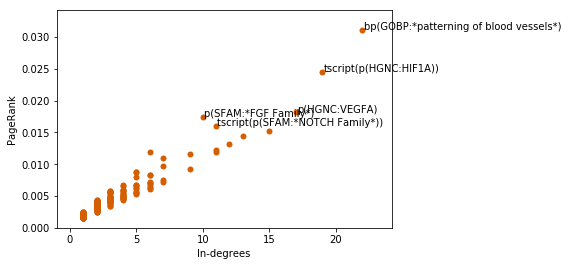

In [18]:
interesting = ['bp(GOBP:*patterning of blood vessels*)', 
                  'tscript(p(HGNC:HIF1A))', 
                  'p(HGNC:VEGFA)',
                  'p(SFAM:*FGF Family*)', 
                  'tscript(p(SFAM:*NOTCH Family*))']
in_degrees = np.ravel(Adj.sum(axis=0))
pagerank_plot(in_degrees, pagerank, Genes, annotations = interesting)

{'p(HGNC:MAPK1)': Text(-0.11364420974630714, 0.2267429328809866, 'p(HGNC:MAPK1)'),
 'p(HGNC:FOXO3)': Text(0.06792664942423846, -0.24175611503601332, 'p(HGNC:FOXO3)'),
 'p(HGNC:TEK)': Text(-0.06743972036977838, -0.2748934190401021, 'p(HGNC:TEK)'),
 'p(HGNC:FOXO1)': Text(-0.001506167594098844, -0.2716942199165535, 'p(HGNC:FOXO1)'),
 'a(SCHEM:*kringle 5*)': Text(-0.14082974110652055, -0.2669606294466777, 'a(SCHEM:*kringle 5*)')}

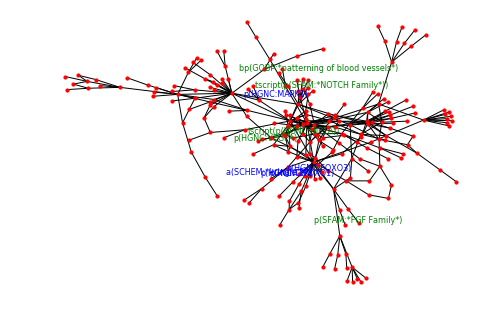

In [20]:
#Extra Credit: This is not the cleanest graph, but there are probably just too many nodes to see the labels without
#any overlap

#From our PageRank results above
labels_busiest = {'bp(GOBP:*patterning of blood vessels*)':'bp(GOBP:*patterning of blood vessels*)', 
                  'tscript(p(HGNC:HIF1A))':'tscript(p(HGNC:HIF1A))', 
                  'p(HGNC:VEGFA)':'p(HGNC:VEGFA)',
                  'p(SFAM:*FGF Family*)':'p(SFAM:*FGF Family*)', 
                  'tscript(p(SFAM:*NOTCH Family*))':'tscript(p(SFAM:*NOTCH Family*))'}

labels_least = {'p(HGNC:MAPK1)':'p(HGNC:MAPK1)',
                'p(HGNC:FOXO3)':'p(HGNC:FOXO3)',
                'p(HGNC:TEK)':'p(HGNC:TEK)',
                'p(HGNC:FOXO1)':'p(HGNC:FOXO1)',
                'a(SCHEM:*kringle 5*)':'a(SCHEM:*kringle 5*)'}

#Set the argument with_labels to False so you have unlabeled graph
nx.draw(angiogenesis, 
        pos = nx.spring_layout(angiogenesis),
        node_size=10, 
        with_labels=False)

#Add labels to the nodes of the five busiest nodes (label them green)
nx.draw_networkx_labels(
    angiogenesis,
    pos = nx.spring_layout(angiogenesis), 
    labels = labels_busiest,
    font_size=8,
    font_color='g')

#Add labels to the nodes of the five least busiest nodes (label them blue)
nx.draw_networkx_labels(
    angiogenesis,
    pos = nx.spring_layout(angiogenesis), 
    labels = labels_least,
    font_size=8,
    font_color='b')

<div style="text-align: right">40 points</div>

# 3. Crazy Professor

Crazy professor has done it again: Given us code that looks ***so*** complicated. It also involves `coroutines`, which are functions that feature a `yield` return, where when the function yields to the caller and if the caller calls it again, the function will resume ***not at the top of the function*** (like with `return`), but *where it left off* instead!

</br >
<center>
<img src="crazy.jpg" width=400 />
</center>

Let's look at an example:

In [1]:
def fibonacci():
    a = 1
    yield a
    b = 1
    yield b
    while (True):
        yield a + b
        a, b = b, a + b
    return "like that's ever going to happen.."

Let's use it:

In [2]:
myfibonacci = fibonacci()
j = 0
for i in myfibonacci:
    print(i)
    j += 1
    if (j>=10): break

1
1
2
3
5
8
13
21
34
55


Ok, that's the fibonacci numbers allright! `myfibonacci` above is called a **generator**, while `fibonacci` is the associated **co-routine**. When we repeatedly call on the generator, it's going to return after every `yield` and then when we call it again, it's going to resume where it left off instead of at the top of the function.

But you know what, crazy professor is a ***pythonista*** and he *hates* the use of iterator variables like `j` above. So he's going to try to ***hide*** them behind some OOP, here below (exactly like the OOP in your homework on genetic algorithms). OOP is only for the benefit of the coder (you), so if you don't like it, ***don't use it*** (unfortunately, professor forgot to tell you this). But from now on he promises all complicated notebook cells will be marked **optional**.

But in the case of the midterm, you're going to have to decipher some complex OOP code, ok?

In [252]:
import datetime

#Prints result of _get_next (the result of unfold) and the time difference
def _log(candidate, startTime):
    timeDiff = datetime.datetime.now() - startTime
    print(candidate, timeDiff)

#Unfold starts with a given a and b (1,1) and than uses fnMutate (pattern(a,b)) which adds the numbers returns that
#a becomes b and b becomes fnMutate(a,b)
def _unfold(pattern):
    a = 1
    yield a
    b = 1
    yield b
    while (True):
        yield pattern(a, b)
        a, b = b, pattern(a,b)
    return "like that's ever going to happen.."

#Recieves a variable limit from MyTest(), should be 10
def _get_next(lim):

    #returns a + b given the input
    def fnMutate(a, b):
        return a + b
    
    #passes fnMutate to _unfold (so adds a+b)
    #next_one is curr + 1 if it is less than lim (10)
    curr = 0
    for next_one in _unfold(fnMutate):
        if (curr < lim):
            curr += 1
            yield next_one
        else:
            break
        
class MyTest():
    
    #Function that triggers an input of 10 into get_numbers
    def test_10(self):
        self.get_numbers(10) 

    #Pass a limit or 10 from test_10()
    def get_numbers(self, limit):
        
        #Start Time is casted at the current time
        startTime = datetime.datetime.now()
        
        #Finds _log and inputs what and startTime - this function exists within test_10()
        #next_one is passed to what (from _get_next)
        def fnDisplay(what):
            _log(what, startTime)

        #Loop through (in a for loop) from next_one to the limit, so _get_next(10)
        #Pass next_one as a variable to fnDisplay
        #next_one is referenced in _get_next
        for next_one in _get_next(limit):
            fnDisplay(next_one)

In [253]:
t = MyTest()
t.test_10()

1 0:00:00.000011
1 0:00:00.000235
2 0:00:00.000304
3 0:00:00.000370
5 0:00:00.000436
8 0:00:00.000548
13 0:00:00.000619
21 0:00:00.000686
34 0:00:00.000752
55 0:00:00.000819


#### Can you implement the same OOP as crazy professor, but for [prime numbers](https://en.wikipedia.org/wiki/Prime_number) instead?**

Using Sieve of Erastothenes provided (and removing some now uneeded functions) we can create a more succinct function to generate the first 100 prime numbers. I used a slightly different methodology that didn't rely on using the mutate function and so that and unfold were no longer necessary. See in line comments in the code below as well.

In [3]:
import datetime

def _log(candidate, startTime):
    timeDiff = datetime.datetime.now() - startTime
    print(candidate, timeDiff)
    
#Recieves a variable limit from MyTest(), should be 542. We need the first 542 numbers to find the first 100 
#prime numbers, so get_numbers must be changed to 542 (range goes up to 541)
def _get_next_prime(lim):
    
    #Use the Sieve of Erastothenes provided in the hint and pass on the limit range set from test_100 to get_numbers
    table = list(range(lim))
    for next_one in range(2,lim):
        if table[next_one]:
            yield table[next_one]
            for mult in range(next_one**2,lim,next_one):
                table[mult] = False
        
class MyTestPrime():
    def test_100(self):
        self.get_numbers(542) 
        #change the values submitted to 542 to recieve the first 100 prime numbers (541 is the 100th prime number)
        #Sieve of Erastothenes needs a range of values to sort through which we pass in as limit to function get_next

    def get_numbers(self, limit):
        startTime = datetime.datetime.now()

        def fnDisplay(what):
            _log(what, startTime)

        # look! No ugly iterator variables here :-)
        for next_one in _get_next_prime(limit):
            fnDisplay(next_one)

In [4]:
p = MyTestPrime()
p.test_100()

2 0:00:00.000022
3 0:00:00.000308
5 0:00:00.000408
7 0:00:00.000485
11 0:00:00.000557
13 0:00:00.000634
17 0:00:00.000698
19 0:00:00.000760
23 0:00:00.000821
29 0:00:00.000881
31 0:00:00.000941
37 0:00:00.001001
41 0:00:00.001061
43 0:00:00.001121
47 0:00:00.001180
53 0:00:00.001241
59 0:00:00.001300
61 0:00:00.001509
67 0:00:00.001571
71 0:00:00.001631
73 0:00:00.001691
79 0:00:00.001751
83 0:00:00.001810
89 0:00:00.001869
97 0:00:00.001931
101 0:00:00.001990
103 0:00:00.002050
107 0:00:00.002109
109 0:00:00.002168
113 0:00:00.002229
127 0:00:00.002289
131 0:00:00.002348
137 0:00:00.002407
139 0:00:00.002466
149 0:00:00.002747
151 0:00:00.002807
157 0:00:00.002848
163 0:00:00.002890
167 0:00:00.002998
173 0:00:00.003108
179 0:00:00.003171
181 0:00:00.003231
191 0:00:00.003292
193 0:00:00.003352
197 0:00:00.003412
199 0:00:00.003473
211 0:00:00.003535
223 0:00:00.003595
227 0:00:00.003655
229 0:00:00.003715
233 0:00:00.003776
239 0:00:00.003837
241 0:00:00.004022
251 0:00:00.004084
257

#### Can you improve on professor's code so that you can specify the mutation function within the `MyTest` class instead?

There are a few ways I can think of moving the mutation function inside of the MyTest class. Here are just a few ideas. Since these are very interlinked objects, one of the easiest (first example) is to move the get_next function into the get_numbers function of MyTest(), relabeled MyTestMutate(). 

In the second example, it is also possible to move fnMutate to be passed as a paramater from MyTest() through test_10 to get_numbers to the unfold function.

In [319]:
#Example 1: Move all of _get_next into MyTest!

import datetime

#Prints result of _get_next (the result of unfold) and the time difference
def _log(candidate, startTime):
    timeDiff = datetime.datetime.now() - startTime
    print(candidate, timeDiff)

#Unfold starts with a given a and b (1,1) and than uses fnMutate (pattern(a,b)) which adds the numbers returns that
#a becomes b and b becomes fnMutate(a,b)
def _unfold(pattern):
    a = 1
    yield a
    b = 1
    yield b
    while (True):
        yield pattern(a, b)
        a, b = b, pattern(a,b)
    return "like that's ever going to happen.."

class MyTestMutate():
    
    #Function that triggers an input of 10 into get_numbers
    def test_10(self):
        self.get_numbers(10) 

    #Pass a limit or 10 from test_10()
    def get_numbers(self, limit):
        
        #Start Time is casted at the current time
        startTime = datetime.datetime.now()
        
        #Finds _log and inputs what and startTime - this function exists within test_10()
        #next_one is passed to what (from _get_next)
        def fnDisplay(what):
            _log(what, startTime)

        #Recieves a variable limit passed from get_numbers, should be 10
        def _get_next(lim):

            #returns a + b given the input
            def fnMutate(a, b):
                return a + b

            #passes fnMutate to _unfold (so adds a+b)
            #next_one is curr + 1 if it is less than lim (10)
            curr = 0
            for next_one in _unfold(fnMutate):
                if (curr < lim):
                    curr += 1
                    yield next_one
                else:
                    break
            
        #Loop through (in a for loop) from next_one to the limit, so _get_next(10)
        #Pass next_one as a variable to fnDisplay
        #next_one is referenced in _get_next
        for next_one in _get_next(limit):
            fnDisplay(next_one)

In [320]:
m = MyTestMutate()
m.test_10()

1 0:00:00.000034
1 0:00:00.000224
2 0:00:00.000301
3 0:00:00.000365
5 0:00:00.000426
8 0:00:00.000488
13 0:00:00.000547
21 0:00:00.000614
34 0:00:00.000675
55 0:00:00.000736


In [80]:
#Example 2: Move fnMutate to test_10 to be passed as a paramater!

import datetime

#Prints result of _get_next (the result of unfold) and the time difference
def _log(candidate, startTime):
    timeDiff = datetime.datetime.now() - startTime
    print(candidate, timeDiff)

#Unfold starts with a given a and b (1,1) and than uses fnMutate (pattern(a,b)) which adds the numbers returns that
#a becomes b and b becomes fnMutate(a,b)
def _unfold(pattern):
    a = 1
    yield a
    b = 1
    yield b
    while (True):
        yield pattern(a,b)
        a, b = b, pattern(a,b)
    return "like that's ever going to happen.."

#Recieves a variable limit passed from get_numbers, should be 10
def _get_next(lim,pattern):

    #next_one is curr + 1 if it is less than lim (10)
    curr = 0
    for next_one in _unfold(pattern):
        if (curr < lim):
            curr += 1
            yield next_one
        else:
            break

class MyTestMutate():
    
    #Function that triggers an input of 10 into get_numbers
    def test_10(self):
    
        #returns a + b given the input
        def fnMutate(a, b):
            return a + b
        
        self.get_numbers(10, fnMutate) 
    
    #Pass a limit or 10 from test_10()
    def get_numbers(self, limit, pattern):
        
        #Start Time is casted at the current time
        startTime = datetime.datetime.now()
        
        #Finds _log and inputs what and startTime - this function exists within test_10()
        #next_one is passed to what (from _get_next)
        def fnDisplay(what):
            _log(what, startTime)
            
        #Loop through (in a for loop) from next_one to the limit, so _get_next(10)
        #Pass next_one as a variable to fnDisplay
        #next_one is referenced in _get_next
        for next_one in _get_next(limit, pattern):
            fnDisplay(next_one)

In [81]:
m = MyTestMutate()
m.test_10()

1 0:00:00.000014
1 0:00:00.000318
2 0:00:00.000399
3 0:00:00.000473
5 0:00:00.000545
8 0:00:00.000618
13 0:00:00.000692
21 0:00:00.000765
34 0:00:00.000839
55 0:00:00.000913


# Visual Studio Code for Debugging (Examples)

</br >

Visual Studio Code is a useful IDE with line by line troubleshooting, easy access to terminal and open source packages that make it ideal for a developer. I've definitely used it in industry before and it has been a fantastic tool!

<b>STEP 1:</b> Run the python code in the Visual Studio Code IDE. Identify the specific line that the issue centers around
<img src="vsc_images/VSC_1.png" width=750 />
    
<b>STEP 2:</b> Go to that problem line and diagnose potentially if this is an error with this object or maybe it is what this object references! This this case, looks like I mistyped an object name!
<img src="vsc_images/VSC_2.png" width=750 />

<b>STEP 3:</b> Fix the issue and rerun the code, identifying any other errors
<img src="vsc_images/VSC_3.png" width=750 />

<b>STEP 4:</b> No issues here!
<img src="vsc_images/VSC_4.png" width=750 />

### Hint
Here's a [sieve of Erastothenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes) in Python, and a list comprehension that returns prime numbers up to 100:

In [153]:
N = 30
table = list(range(N))
for i in range(2,int(N**0.5)+1):
    if table[i]:
        for mult in range(i**2,N,i):
            table[mult] = False
 
primes = [p for p in table if p][1:]
primes

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

### Hint \#2
The only tricky part is to realize the sieve needs to go up to at least the thousands in order to be able to list the first 100 prime numbers. You'll have to try it out. Another tricky part is to realize that the `_unfold` function for prime numbers only needs to take a single input: a primer number, in order to return the next one in the list. Another possibly tricky part is you need to know how to get the first prime number from the sieve, because the `_unfold` pattern needs it. But just start at 2, everyone knows that's the first prime number! Ok, no more tricks, I told you everything :-)

### Hint #3

You can debug programs right on a notebook by fleshing out bigger cell blocks into smaller cell blocks. But a more professional way of dong this is by using a **debugger**. Here below, I show you how to install **Visual Studio Code**, the most popular Integrated Development Envrionment (IDE) for python systems/Web (i.e. *not* science) programming. 

In class, I'll show you how to debug with Visual Studio Code, in order to get a better understanding about what the heck you need to do with **Problem \#3 Crazy Professor**.

#### Download Visual Studio Code for [Mac OS X](https://code.visualstudio.com/docs?dv=osx)

- Double-click on VSCode-osx.zip to expand the contents
- Drag Visual Studio Code.app to the Applications folder, making it available in the Launchpad.
- Add VS Code to your Dock by right-clicking on the icon and choosing Options, Keep in Dock.
- If you want to run VS Code from the terminal, append the following to your ~/.bash_profile file (~/.zshrc in case you use zsh).
```(python)
code () { VSCODE_CWD="$PWD" open -n -b "com.microsoft.VSCode" --args $* ;}
```

Now, you can simply type `code .` in any folder to start editing files in that folder with Visual Studio Code.

#### Download Visual Studio Code for [Windows](https://code.visualstudio.com/docs?dv=win)

- Double-click on `VSCodeSetup.exe` to launch the setup process
- Visual Studio Code will be added to your path, so from the console you can simply type `code .` to open VS Code on that folder!
- You might need to log off after the installation for the change to the PATH environmental variable to take effect


#### Download Visual Studio Code for [Linux](https://code.visualstudio.com/docs?dv=linux64)

- Make a new folder and extract `VSCode-linux-x64.zip` inside that folder
- Double click on Code to run Visual Studio Code
- If you want to run VS Code from the terminal, create the following link substituting `/path/to/vscode/Code` with the absolute path to the Code executable
```(python)
sudo ln -s /path/to/vscode/Code /usr/local/bin/code
```
- Now, you can simply type `code .` in any folder to start editing files in that folder.

#### Additional hint

There are a few things you took for granted in a python noteobook that do not work in a regular `.py` file. For example, you cannot just type `primes` as with the last line of the code block above. You need to explicitely type `print(primes)` instead.

Part of your assignment for this midterm is to learn how to use Visual Studio Code. It will be your friend, if you do, and next lecture we'll even dab into some Web and games programming for fun. But you can also totally do the midterm by staying within the warm, fuzzy confines of your deal old friend: your python notebook.

</br >
<center>
<img src="vscode.png" width=1000 />
</center>